In [1]:
import pandas as pd
import numpy as np
import gzip
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from matplotlib.ticker import FuncFormatter

In [2]:
months = ['november2022', 'december2022', 'january2023', 'february2023', 'mars2023', 'april2023', 'may2023', 
          'june2023', 'july2023', 'august2023', 'september2023', 'october2023']
dataframes = {}

for month in months:
    # Define the file path
    file_path = '../data/listings/listings_' + month + '.csv.gz'
    # Use gzip.open to decompress the file and then read it with Pandas
    with gzip.open(file_path, 'rt', encoding='utf-8') as file:
        data = pd.read_csv(file)

    dataframes[month] = data

C:\Users\heiwi\AppData\Local\Temp\ipykernel_7232\2403487248.py:10: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file)
C:\Users\heiwi\AppData\Local\Temp\ipykernel_7232\2403487248.py:10: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file)
C:\Users\heiwi\AppData\Local\Temp\ipykernel_7232\2403487248.py:10: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file)
C:\Users\heiwi\AppData\Local\Temp\ipykernel_7232\2403487248.py:10: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file)
C:\Users\heiwi\AppData\Local\Temp\ipykernel_7232\2403487248.py:10: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file)
C:\Users\heiwi\AppData\Lo

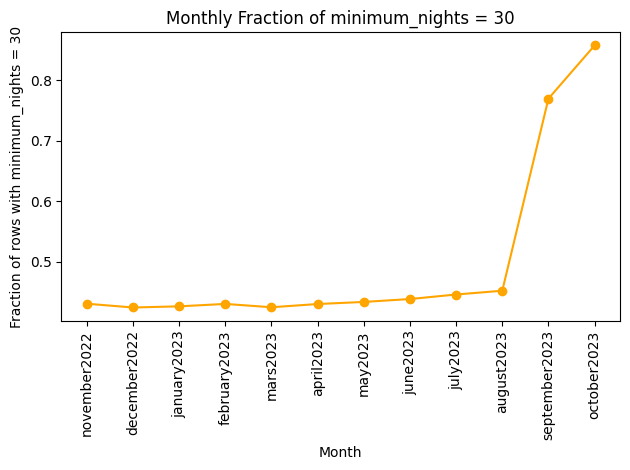

In [3]:
# Assuming 'dataframes_dict' is your dictionary and 'months' is your list of keys
fractions = []
for month in months:
    df = dataframes[month]
    fraction = (df['minimum_nights'] == 30).sum() / len(df)
    fractions.append(fraction)

# Now plot the results
plt.plot(months, fractions, marker='o', color='orange')
plt.xlabel('Month')
plt.ylabel('Fraction of rows with minimum_nights = 30')
plt.title('Monthly Fraction of minimum_nights = 30')
plt.xticks(rotation=90)  # Rotate the x-axis labels to avoid collision
plt.tight_layout()  # Adjust layout so everything fits without overlapping
plt.show()

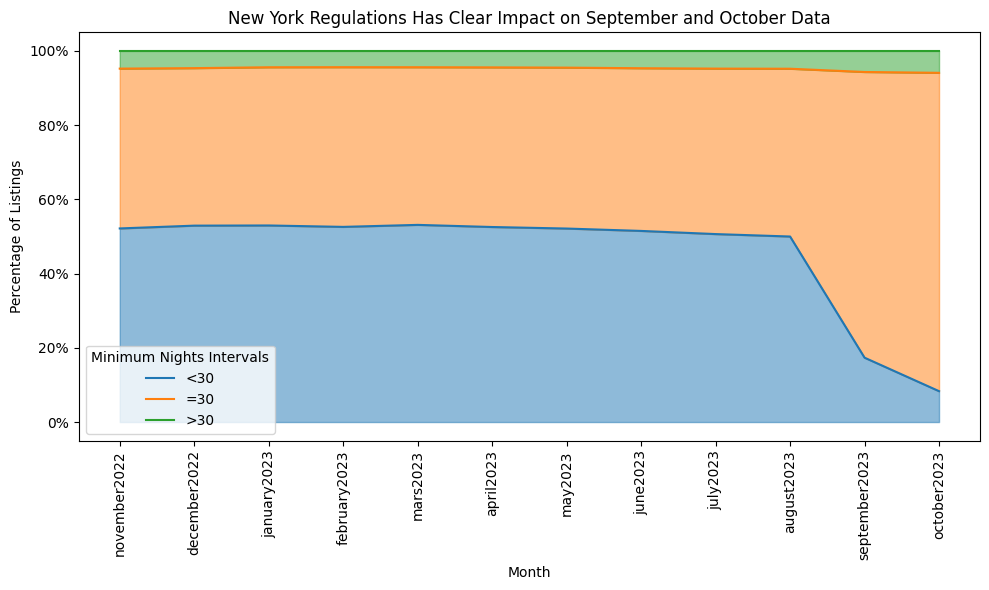

In [6]:
# Creating a DataFrame to store the counts for each interval per month
interval_counts = pd.DataFrame(index=months, columns=['<30', '=30', '>30'])

# Populating the DataFrame with the counts for each interval
for month in months:
    df = dataframes[month]
    interval_counts.loc[month, '<30'] = df['minimum_nights'][df['minimum_nights'] < 30].count()
    interval_counts.loc[month, '=30'] = df['minimum_nights'][df['minimum_nights'] == 30].count()
    interval_counts.loc[month, '>30'] = df['minimum_nights'][df['minimum_nights'] > 30].count()

# Converting all values to numeric to avoid any potential issues
interval_counts = interval_counts.apply(pd.to_numeric)

# Calculating the total counts per month for normalization
total_counts_per_month = interval_counts.sum(axis=1)

# Calculating the percentage of each interval relative to the total
interval_percentages = interval_counts.div(total_counts_per_month, axis=0) * 100

# Calculating the cumulative sum of these percentages
interval_percentages_cumsum = interval_percentages.cumsum(axis=1)

# Define colors for the lines
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # blue, orange, green

# Create the plot
plt.figure(figsize=(10, 6))

# Reset the lower limit for the new plot
lower_limit = np.zeros(len(months))

# Plotting the percentages
for i, interval in enumerate(interval_percentages_cumsum.columns):
    # Get the color for the current interval
    color = colors[i]

    # Get the y-values for the current interval
    y_values = interval_percentages_cumsum[interval].values

    # Plot the line for the current interval
    plt.plot(months, y_values, label=interval, color=color)

    # Fill the area between the current line and the lower limit
    plt.fill_between(months, lower_limit, y_values, color=color, alpha=0.5)

    # Update the lower limit to the current line's values
    lower_limit = y_values

# Set the x-ticks to correspond to the months
plt.xticks(ticks=np.arange(len(months)), labels=months, rotation=90)

# Format y-axis as integer percentages
formatter = FuncFormatter(lambda y, _: f'{int(y)}%')
plt.gca().yaxis.set_major_formatter(formatter)

# Adding legend, titles, and labels
plt.legend(title='Minimum Nights Intervals')
plt.title('New York Regulations Has Clear Impact on September and October Data')
plt.xlabel('Month')
plt.ylabel('Percentage of Listings')

# Show the plot
plt.tight_layout()
plt.show()
